# Final Exam

Worth 50 points.

You may work in groups of up to 2 people or complete the final exam independently.

The final exam should be submitted as a Jupyter Notebook file in Canvas.  The code chunks should be run and the output should be visible upon opening the saved file.  Make sure the code is in "Code" format and the write-ups are in "Markdown" format.

The final exam should include:


### Webscraping
+10 points possible

- Obtain data using webscraping.
- Data must include at least 2 unique variables or 1 variable with multiple unique categories that can be compared in statistical analysis.
- May use Wikipedia or IMDb and follow the examples set up in class or choose your own website.
- Must include a write-up for what the data is, what it represents, and how it is being used in the analysis.


### Graphs
+10 points possible

- At least 1 graph in MatPlotLib and at least 1 graph in Seaborn.
- Graphs should be formatted with x- and y-axis labels, coloring, and titles.  The individual observations (such as rectangles of bar charts or wedges of pie charts) should include labels, where applicable.
- There should be a total of 3 unique graphs types.
- Include a write-up describing what data you are visualizing and any points of interest that stick out to you.  If it is not obvious, include a description of why you chose the specific visualization.


### Data Frames
+10 points possible

- You should create at least 1 dataframe using Pandas.
- The data frame should have named columns that are appropriate for the data.
- Data should be cleaned including: NaN values or duplicates should be removed, formatting should be fine-tuned, etc.
- Include a write-up on how you cleaned the data and any issues in the data that you may have come across.


### Statistical Analysis
+10 points possible

- Include descriptive analysis of univariate variables such as finding means, standard deviations, variances, ... The univariate statistics should be displayed in some sort of dataframe, list or table so that the reader can identify which variable and statistic is being reported.
- Include at least 1 statistical test such as a t-test for the difference between two independent or paired means,  F test in ANOVA, linear regression (must include p-values for the predictor variables), etc.
- You should write about what you are testing and why.
- Include a follow up portion about what other types of testing you might conduct, including if you had access to different data.

### Formatting
+10 points possible.

- Should be turned in on time.
- Turned in via Jupyter Notebook file.  File is already run with outputs showing.
- Layout is easy to follow with appropriate code chunks, with appropriate commenting, and markdown chunks.
- Write-ups are easily read and add to the overall analysis.

In [ ]:
Contributors = 'Aly Liephart', 'David Yao', 'James Cooper'

## Packages:

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from os import path
import scipy.stats

## Scraping the Amazon Best Selling Books

In [2]:
no_pages = 2

def get_data(pageNo):  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r = requests.get('https://www.amazon.com/gp/bestsellers/books/ref=zg_bs_pg_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content = r.content
    soup = BeautifulSoup(content)
    #print(soup)

    alls = []
    for d in soup.findAll('div', attrs={'class':'a-section a-spacing-none aok-relative'}):
        #print(d)
        name = d.find('span', attrs={'class':'zg-text-center-align'})
        n = name.find_all('img', alt=True)
        #print(n[0]['alt'])
        author = d.find('a', attrs={'class':'a-size-small a-link-child'})
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('a', attrs={'class':'a-size-small a-link-normal'})
        price = d.find('span', attrs={'class':'p13n-sc-price'})

        all1=[]

        if name is not None:
            #print(n[0]['alt'])
            all1.append(n[0]['alt'])
        else:
            all1.append("unknown-product")

        if author is not None:
            #print(author.text)
            all1.append(author.text)
        elif author is None:
            author = d.find('span', attrs={'class':'a-size-small a-color-base'})
            if author is not None:
                all1.append(author.text)
            else:    
                all1.append('0')

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append('-1')

        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append('0')     

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)    
    return alls

## Creating a Dataframe

In [3]:
results = []
for i in range(1, no_pages+1):
    results.append(get_data(i))
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Book Name','Author','Rating','Customers_Rated', 'Price'])
df.head()

,Book Name,Author,Rating,Customers_Rated,Price
0,American Marxism,Mark R. Levin,-1,0,$28.00
1,What Happened to You?: Conversations on Trauma...,Oprah Winfrey,4.1 out of 5 stars,7,$17.39
2,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.8 out of 5 stars,"53,623",$5.38
3,Sooley: A Novel,John Grisham,4.8 out of 5 stars,7,$17.60
4,Shadow and Bone (Grisha Trilogy),Leigh Bardugo,4.4 out of 5 stars,"8,431",$8.23


## Cleaning up the Dataframe

In [12]:
df['Rating'] = df['Rating'].apply(lambda x: x.split()[0])
df['Rating'] = pd.to_numeric(df['Rating'])
df["Price"] = df["Price"].str.replace('$', '')
df["Price"] = df["Price"].str.replace(',', '')
df['Price'] = df['Price'].apply(lambda x: x.split('.')[0])
df['Price'] = df['Price'].astype(int)
df["Customers_Rated"] = df["Customers_Rated"].str.replace(',', '')
df['Customers_Rated'] = pd.to_numeric(df['Customers_Rated'], errors='ignore')
df.head()

AttributeError: 'float' object has no attribute 'split'

## Verify the data types of the DataFrame

In [6]:
df.dtypes

Book Name           object
Author              object
Rating             float64
Customers_Rated      int64
Price                int32
dtype: object

## Replace the zero values in the DataFrame to NaN

In [7]:
df.replace(str(0), np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)

## Counting the Number of NaNs in the DataFrame

In [8]:
count_nan = len(df) - df.count()
count_nan

Book Name          0
Author             0
Rating             0
Customers_Rated    9
Price              0
dtype: int64

In [9]:
#droppping NaNs
df = df.dropna()

## Correlation Matrix

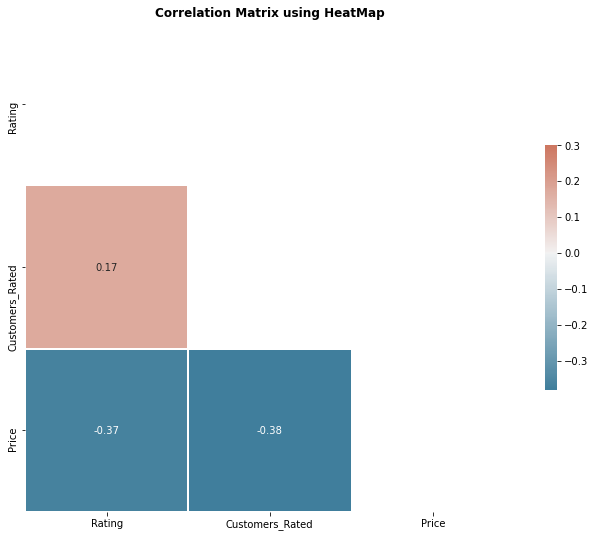

In [10]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(),annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix using HeatMap",fontweight="bold")
plt.show()

#### There is positive correlation between:
- 'Customers_Rated' and 'Rating'

#### There is negative correlation between:
- 'Price' and 'Rating'
- 'Price' and 'Customer_Rated'

## Book Distribution By Ratings

AttributeError: 'Rectangle' object has no property 'labels'

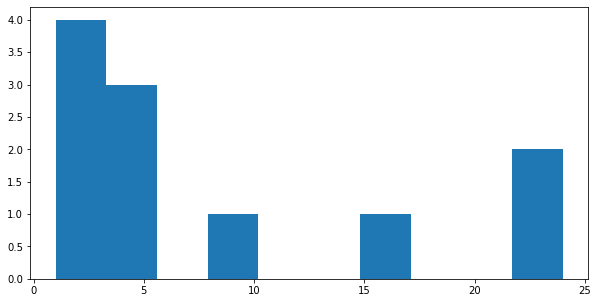

In [11]:
plt.figure(figsize=(10,5))
plt.hist(df['Rating'].value_counts().sort_values(),labels=df['Rating'].value_counts().index,explode=[0.05,0])
plt.subplots_adjust(bottom=0, top=0.93, left=0.5, right=1)
plt.title("Distribution of Best Selling Books based on Rating",fontweight="bold")
plt.show()

[Text(0.5, 1.0, 'Density Plot of Book Prices'),
 Text(0.5, 0, 'Book Price'),
 Text(0, 0.5, 'Probability Density')]

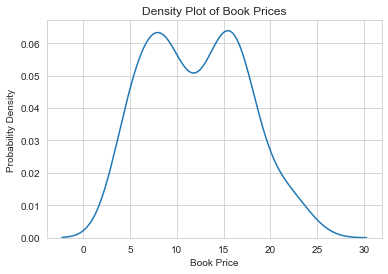

In [23]:
## Density plot (Seaborn) of book prices

p_dens = df['Price']
sns.set_style('whitegrid')
ax = sns.kdeplot(np.array(p_dens))
ax.set(title = 'Density Plot of Book Prices', xlabel = 'Book Price', ylabel = 'Probability Density')

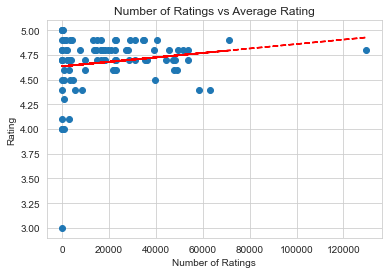

In [42]:
x = df['Customers_Rated']
y = df['Rating']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
indexC = pd.Series.sort_values(x)
plt.scatter(x,y)
plt.xlabel('Number of Ratings')
plt.ylabel('Rating')
plt.title('Number of Ratings vs Average Rating')
plt.plot(x,p(x),'r--')
plt.show()

##For this graph I wanted to see if ratings for books with more ratings overall could be considered more reliable. 
##It could've gone either way, but there seems to be a slight upward trend, indicating higher ratings for a higher number of responses
## But this doesn't necessarily give us an indication of more reliable ratings, however that could be inferred by the number of ratings overall.

In [ ]:
## We cannot perform a T-test on this dataset, since we are not given two subsets from which we could determine if they're from the same sample 